In [1]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools
import warnings
warnings.filterwarnings('ignore')
from utils.data_proc import tab_data
from utils.data_proc import dataframe_column_adj
from utils.data_proc import load_data
from utils.data_proc import find_nearest



def recall_from_roc(x, threshold):
    filt_array = np.array(x['precision'])>threshold
    if sum(filt_array)>0:
        return max(np.array(x['recall'])[filt_array])
    else:
        return 0.
    
def energy_from_roc(x, threshold):
    filt_array = np.array(x['precision'])>threshold
    if sum(filt_array)>0:
        return (np.array(x['energy_after_threshold'])[filt_array]).max()
    else:
        return 0.

PATH = '../data/for_analysis/'

In [2]:
files = glob.glob(PATH + '*.json')

In [3]:
result_table = []
for file in files:
    result_table.append(tab_data(file))
result_table = pd.concat(result_table)

In [4]:
result_table =  dataframe_column_adj(result_table)

In [5]:
result_table.head()

,particle,energy,image,energia_ped,cluster_integral,filter,parameter,energy_after_threshold,recall,precision,threshold_all,f1
0,He,30,pic_run1_ev41,14971.742352,14967.0,median,3,"[14972.932259081239, 14961.369371285826, 14883...","[0.9982014388489209, 0.960431654676259, 0.8723...","[0.000141734756809972, 0.00024522849187692103,...","[-1.26429584755097, -0.042642556388374775, 1.1...",0.731982
1,He,30,pic_run1_ev41,14971.742352,14967.0,median,5,"[14975.532034942682, 14966.79096403338, 14828....","[0.9982014388489209, 0.9784172661870504, 0.830...","[0.00013961976130303727, 0.0005093046400086881...","[-1.1603253685120924, 0.45900975891702855, 2.0...",0.800429
2,He,30,pic_run1_ev41,14971.742352,14967.0,median,7,"[14975.532034942682, 14947.4271007277, 14826.4...","[0.9982014388489209, 0.9730215827338129, 0.820...","[0.00015139702628961624, 0.0026750924662275757...","[-0.713554817201295, 1.0280358045155942, 2.769...",0.830228
3,He,30,pic_run1_ev41,14971.742352,14967.0,median,9,"[14967.775474283468, 14947.749026665613, 14821...","[0.9982014388489209, 0.9586330935251799, 0.818...","[0.00023738907941798186, 0.07055864442679376, ...","[-0.086757273233213, 1.7346584002277148, 3.556...",0.850467
4,He,30,pic_run1_ev41,14971.742352,14967.0,median,11,"[14967.775474283468, 14963.980207575785, 14891...","[0.9982014388489209, 0.9766187050359713, 0.870...","[0.00023225994365499314, 0.05167491435097069, ...","[-0.10249334514017167, 1.6188714194369223, 3.3...",0.865191


In [6]:
best_filters = result_table.groupby(['particle', 'energy', 'image', 'filter']).agg({'f1':'max'}).reset_index()

[None, None]

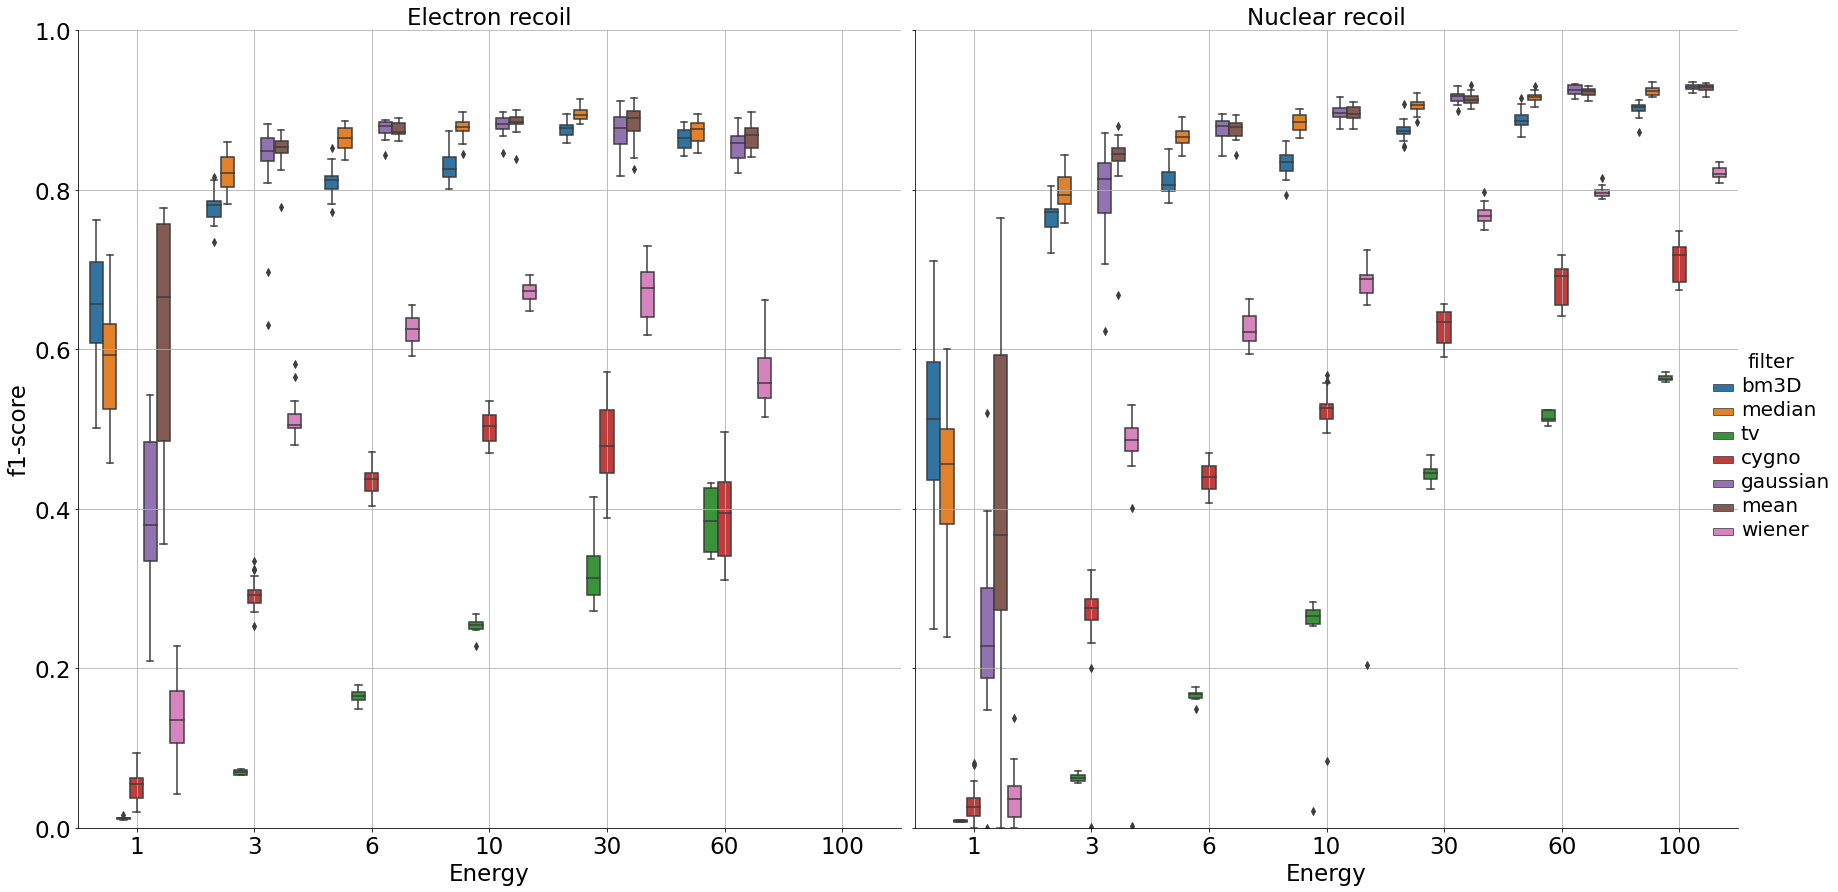

In [7]:
#plt.figure(figsize=(30,15))
g = sns.catplot(x="energy", y="f1", hue="filter", col="particle", data=best_filters, kind="box", height=12, aspect=1)
axes = g.axes.ravel()
axes[0].grid()
axes[1].grid()
axes[0].set_xlabel('Energy', fontsize=23)
axes[0].set_ylabel('f1-score', fontsize=23)
axes[1].set_xlabel('Energy', fontsize=23)
axes[0].tick_params(axis='both', which='major', labelsize=23)
axes[1].tick_params(axis='both', which='major', labelsize=23)
axes[0].set_ylim([0, 1])
axes[1].set_ylim([0, 1])
axes[0].set_title('Electron recoil', fontsize=23)
axes[1].set_title('Nuclear recoil', fontsize=23)

plt.setp(g._legend.get_texts(), fontsize=20)
plt.setp(g._legend.get_title(), fontsize=20)

In [8]:
threshold_precision = 0.90
result_table['recall_at_p'] = result_table.apply(lambda x: recall_from_roc(x, threshold_precision), axis=1)
result_table['energy_at_p'] = result_table.apply(lambda x: energy_from_roc(x, threshold_precision), axis=1)

In [9]:
energy_table = result_table.groupby(['particle', 'energy', 'image', 'filter']).agg({'f1':'max', 'recall_at_p': 'max', 'energy_at_p':'max', 'cluster_integral': 'max', 'energia_ped':'max'}).reset_index()

In [10]:
energy_table

,particle,energy,image,filter,f1,recall_at_p,energy_at_p,cluster_integral,energia_ped
0,ER,1,pic_run1_ev1,bm3D,0.655462,0.384977,284.869463,498.0,557.003767
1,ER,1,pic_run1_ev1,median,0.569343,0.211268,176.003860,498.0,557.003767
2,ER,1,pic_run1_ev11,tv,0.011674,0.000000,0.000000,496.0,419.426884
3,ER,1,pic_run1_ev14,bm3D,0.640884,0.488789,373.403318,499.0,495.604244
4,ER,1,pic_run1_ev14,median,0.526946,0.313901,272.693068,499.0,495.604244
...,...,...,...,...,...,...,...,...,...
1873,He,100,pic_run1_ev97,wiener,0.814875,0.710959,7156.490235,49920.0,7472.114393
1874,He,100,pic_run1_ev98,bm3D,0.894356,0.840483,49704.590128,49874.0,49821.610470
1875,He,100,pic_run1_ev98,median,0.929293,0.941019,49778.268393,49874.0,49821.610470
1876,He,100,pic_run1_ev99,cygno,0.678668,0.530239,5719.342070,49898.0,7334.597503


In [11]:
energy_table.columns = ['particle', 'energy', 'image', 'filter', 'f1', 'recall_p_value', 'recovered_energy', 'cluster_integral_truth', 'cluster_integral_after_ped']

In [12]:
data=pd.melt(energy_table[['energy', 'particle', 'cluster_integral_truth', 'cluster_integral_after_ped']], id_vars=['particle', 'energy'])
data

,particle,energy,variable,value
0,ER,1,cluster_integral_truth,498.000000
1,ER,1,cluster_integral_truth,498.000000
2,ER,1,cluster_integral_truth,496.000000
3,ER,1,cluster_integral_truth,499.000000
4,ER,1,cluster_integral_truth,499.000000
...,...,...,...,...
3751,He,100,cluster_integral_after_ped,7472.114393
3752,He,100,cluster_integral_after_ped,49821.610470
3753,He,100,cluster_integral_after_ped,49821.610470
3754,He,100,cluster_integral_after_ped,7334.597503


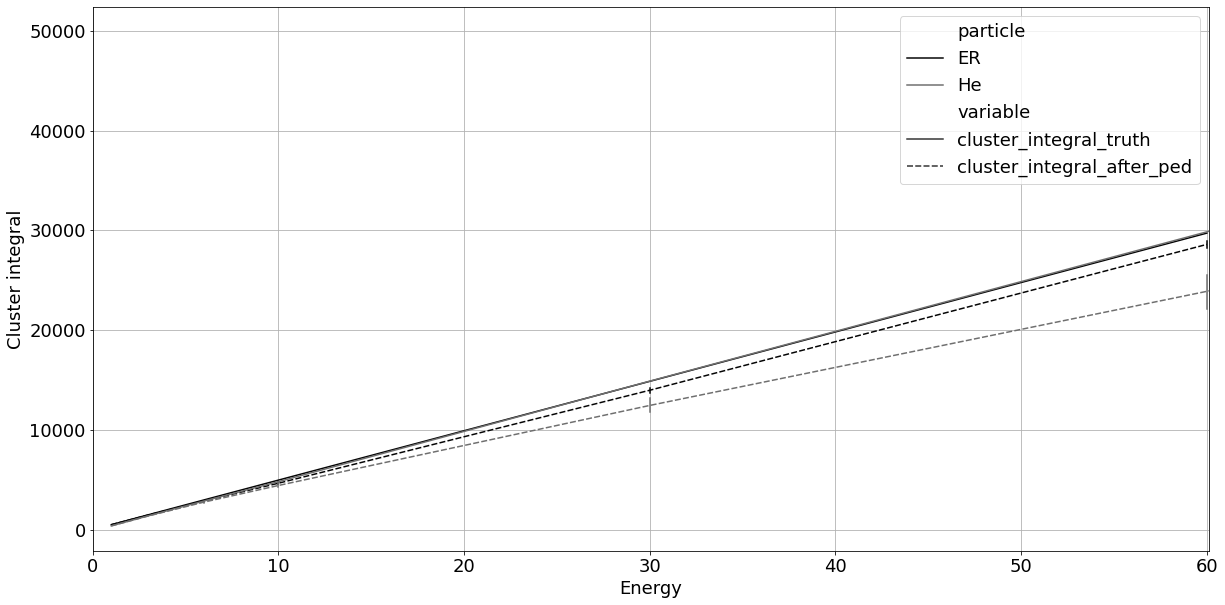

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
#palette = sns.color_palette("mako_r", 2)
# Create an array with the colors you want to use
colors = ["#040404", "#6F6F6F"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
sns.lineplot(x="energy", y="value", hue="particle", data=data,  err_style="bars", style="variable",  palette=customPalette, ax=axes)
axes.grid()
axes.set_ylabel('Cluster integral', fontsize=18)
axes.set_xlabel('Energy', fontsize=18)
axes.set_xlim([0, 60.1])
axes.tick_params(axis='both', which='major', labelsize=18)
axes.legend(fontsize=18)

In [14]:
energy_filter = energy_table[['energy', 'particle', 'filter', 'recovered_energy']]

In [15]:
energy_real = energy_table[['energy', 'particle', 'cluster_integral_after_ped']]
energy_real.columns = ['energy', 'particle', 'recovered_energy']
energy_real['filter'] = 'Energy after ped rem'

In [16]:
energy_filter = energy_filter.append(energy_real).reset_index(drop=True)

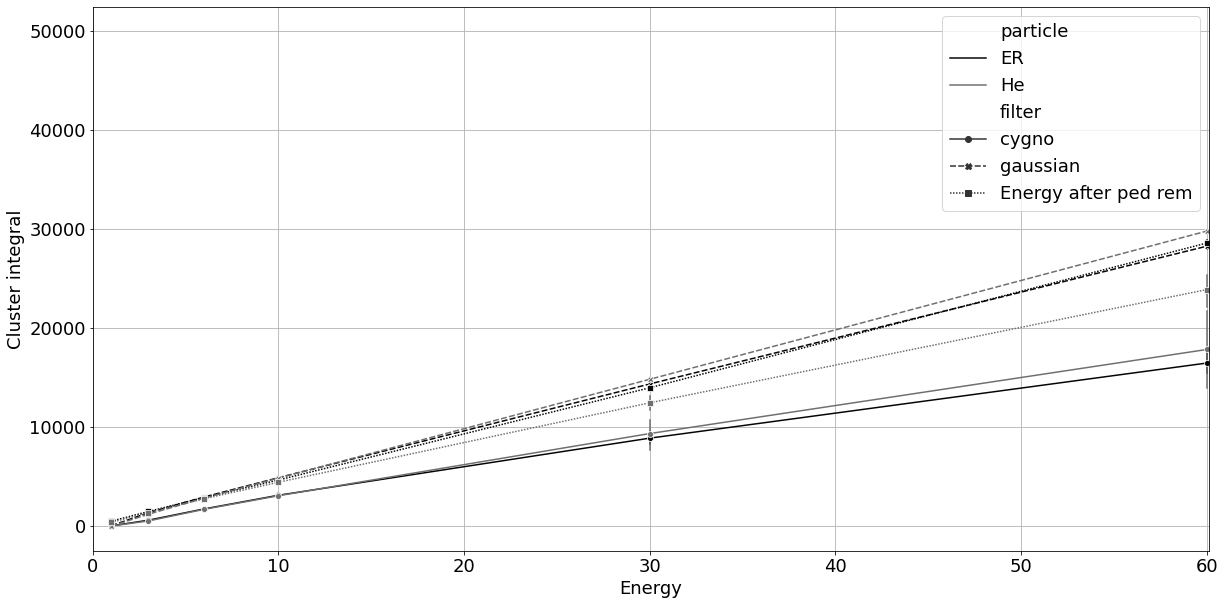

In [17]:
selec_filters = ['gaussian', 'Energy after ped rem', 'cygno']

# Create an array with the colors you want to use
colors = ["#040404", "#6F6F6F"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(1, 1, figsize=(20, 10))
#palette = sns.color_palette("hls", 2)
ax = sns.lineplot(x="energy", y="recovered_energy", hue="particle", data=energy_filter[energy_filter['filter'].isin(selec_filters)],  err_style="bars", style="filter",  palette=customPalette, markers=True,ax=axes)
axes.grid()
axes.set_ylabel('Cluster integral', fontsize=18)
axes.set_xlabel('Energy', fontsize=18)
axes.set_xlim([0, 60.1])
axes.tick_params(axis='both', which='major', labelsize=18)
axes.legend(fontsize=18)

## Filters working in a real environment

In [18]:
result_table_by_filter = result_table.groupby(['filter', 'parameter']).agg({'f1':['median', lambda x: np.quantile(x, q=0.25), lambda x: np.quantile(x, q=0.75)], 'precision':[lambda x: list(x)], 'recall':[lambda x: list(x)], 'threshold_all':[lambda x: list(x)]}).reset_index()
result_table_by_filter.columns = ['filter', 'parameter', 'f1_median', '25q', '75q', 'precision', 'recall', 'threshold']

In [19]:
result_table_by_filter = result_table_by_filter.sort_values('f1_median', ascending=False).drop_duplicates(subset='filter', keep='first')

In [20]:
result_table_by_filter['precision'] = result_table_by_filter.precision.apply(lambda x: np.array(x).mean(axis=0))
result_table_by_filter['recall'] = result_table_by_filter.recall.apply(lambda x: np.array(x).mean(axis=0))
result_table_by_filter['threshold'] = result_table_by_filter.threshold.apply(lambda x: np.array(x).mean(axis=0))

In [21]:
result_table_by_filter = result_table_by_filter.reset_index().drop('index', axis=1)

In [22]:
result_table_by_filter

,filter,parameter,f1_median,25q,75q,precision,recall,threshold
0,mean,11,0.876425,0.824972,0.901677,"[0.002861843363185918, 0.11619688661328506, 0....","[0.9974981496305669, 0.9939918857544965, 0.987...","[-0.23687400112253099, 0.42701447541654597, 1...."
1,gaussian,13,0.872661,0.812138,0.901919,"[0.18554375424395783, 0.22014984635464838, 0.2...","[0.9974981496305669, 0.9964830945882155, 0.994...","[2.5386907271460815, 3.1443771242591065, 3.750..."
2,median,19,0.869669,0.816175,0.894736,"[0.023048475592909904, 0.13790938869933367, 0....","[0.9975299464091353, 0.9924522079179433, 0.977...","[1.0375671237165343, 1.6617120433742119, 2.285..."
3,bm3D,8,0.825941,0.775583,0.871968,"[0.0002619515544281131, 0.0003612040424617654,...","[0.997613146681639, 0.9897703879139136, 0.9749...","[-0.795090945254868, -0.29770905006781406, 0.1..."
4,wiener,1,0.634468,0.503379,0.702589,"[0.00021869560528999535, 0.0002198357129356990...","[0.9955087679122814, 0.9948134756018554, 0.994...","[-2.538631792330023, -2.380736229919634, -2.22..."
5,cygno,0,0.444444,0.289319,0.543330,"[0.00020985098985525278, 0.0002098509898552527...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-26.0, -25.649999999999768, -25.2999999999998..."
6,tv,0,0.072815,0.009242,0.272298,"[0.00021881996687240577, 0.0015772044666593082...","[0.9976054946765479, 0.9897220707256075, 0.977...","[-7.117744766988207, -6.613767512264986, -6.10..."


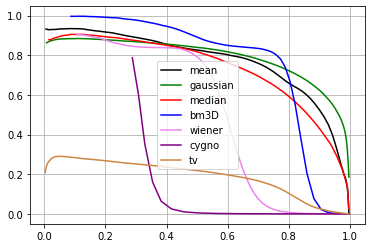

In [23]:
color = ['black', 'green', 'red', 'blue', 'violet', 'purple', 'peru']
for i in range(result_table_by_filter.shape[0]):
    row = result_table_by_filter.loc[i,:]
    x = row.recall
    y = row.precision
    fname = row['filter']
    plt.plot(x,y, label=fname, color=color[i])
plt.legend()
plt.grid()

## Determinando o ponto de operação

In [42]:
value = 0.7
output_params = {'filter':[], 'parameter':[], 'precision':[], 'recall': [], 'threshold_value': []}
for i in range(result_table_by_filter.shape[0]):
    row = result_table_by_filter.loc[i,:]
    x = row.recall
    y = row.precision
    index, precision_value = find_nearest(np.nan_to_num(y), value)
    output_params['filter'].append(row['filter'])
    output_params['parameter'].append(row.parameter)
    output_params['threshold_value'].append(row.threshold[index])
    output_params['precision'].append(precision_value)
    output_params['recall'].append(x[index])

In [43]:
pd.DataFrame(output_params)

,filter,parameter,precision,recall,threshold_value
0,mean,11,0.700966,0.764565,12.377007
1,gaussian,13,0.701244,0.828407,15.863791
2,median,19,0.702191,0.691158,14.144610
3,bm3D,8,0.668752,0.804553,4.178728
4,wiener,1,0.703599,0.545908,4.882460
5,cygno,0,0.787880,0.287962,4.450000
6,tv,0,0.290718,0.052418,38.744185
